(307, 408, 3)

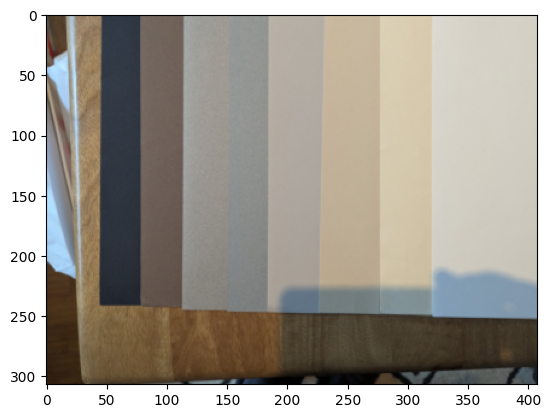

In [1]:
from skimage import io
from skimage.transform import rescale
import numpy as np
import matplotlib.pyplot as plt
import json


im0 = io.imread('papers_2.jpg')

# scale down cell phone photo as to make everything more convenient
scale = 0.1
im = np.round(rescale(im0, scale, channel_axis=-1, preserve_range=True)).astype(np.uint8)

plt.imshow(im)
im.shape

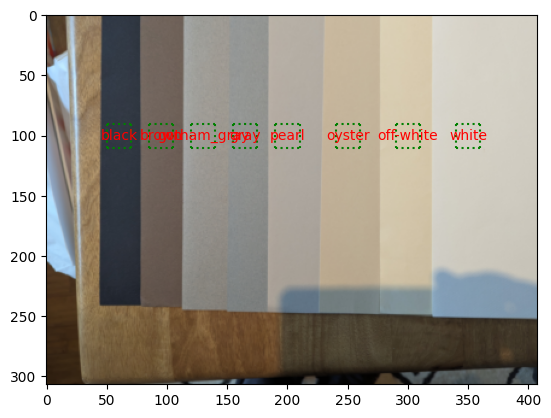

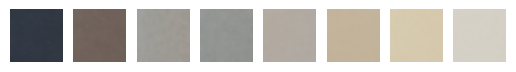

In [27]:
""" 
*** Adjust `rects` dictionary below ***

* keys should be the names of your papers' colors
* values should be the [x, y, width, height]

adjust the coordinates so the rectangles fall on representative patches of your papers
"""

# these are mi-teintes papers
rects = {
    'black': [60, 100, 20, 20],
    'brown': [95, 100, 20, 20],  # I think this is "tobacco"
    'gotham_gray': [130, 100, 20, 20],  
    'gray': [165, 100, 20, 20],  # "gray" is the official color name
    'pearl': [200, 100, 20, 20],
    'oyster':   [250, 100, 20, 20],  # the tan/beige color
    'off-white': [300, 100, 20, 20],  # not sure the actual color name
    'white': [350, 100, 20, 20]
}

plt.imshow(im)
for color_name, [x,y,w,h] in rects.items():
    xmin = x - w/2
    xmax = xmin + w
    ymin = y - h/2
    ymax = ymin + h
    plt.plot([xmin, xmin], [ymin, ymax], 'g:')
    plt.plot([xmax, xmax], [ymin, ymax], 'g:')
    plt.plot([xmin, xmax], [ymin, ymin], 'g:')
    plt.plot([xmin, xmax], [ymax, ymax], 'g:')
    plt.text(x, y, color_name, color='r', ha='center', va='center')


plt.figure()
rowsta, rowend = 0, im.shape[0]
for num, (color_name, [x,y,w,h]) in enumerate(rects.items()):
    rowmin = y - h//2
    rowmax = rowmin + h
    colmin = x - w//2
    colmax = colmin + w
    color_crop = im[rowmin:rowmax, colmin:colmax]
    plt.subplot(1, len(rects), num+1)
    plt.imshow(color_crop)
    plt.axis('off')


In [28]:
colors = {}
for num, (color_name, [x,y,w,h]) in enumerate(rects.items()):
    rowmin = y - h//2
    rowmax = rowmin + h
    colmin = x - w//2
    colmax = colmin + w
    color_crop = im[rowmin:rowmax, colmin:colmax]
    colors[color_name] = np.round(color_crop.mean(0).mean(0)).astype(int).tolist()

print('Computed colors:')
print(json.dumps(colors, indent=4))

out_fn = 'paper-colors.json'
with open(out_fn, 'wt') as f:
    json.dump(colors, f)
print(f'Saved to {out_fn}')

Computed colors:
{
    "black": [
        49,
        56,
        67
    ],
    "brown": [
        112,
        98,
        91
    ],
    "gotham_gray": [
        158,
        155,
        150
    ],
    "gray": [
        147,
        149,
        146
    ],
    "pearl": [
        178,
        170,
        161
    ],
    "oyster": [
        195,
        180,
        154
    ],
    "off-white": [
        214,
        202,
        174
    ],
    "white": [
        213,
        209,
        198
    ]
}
Saved to paper-colors.json
